Q1. What is meant by time-dependent seasonal components?

Q2. How can time-dependent seasonal components be identified in time series data?

Q3. What are the factors that can influence time-dependent seasonal components?

Q4. How are autoregression models used in time series analysis and forecasting?

Q6. What is a moving average (MA) model and how does it differ from other time series models?

# Lets look at ARIMA model practically

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [9]:
np.random.seed(55)
data = np.random.randn(1500)

time_series = pd.Series(data, index=pd.date_range('1/1/2020', periods=1500))

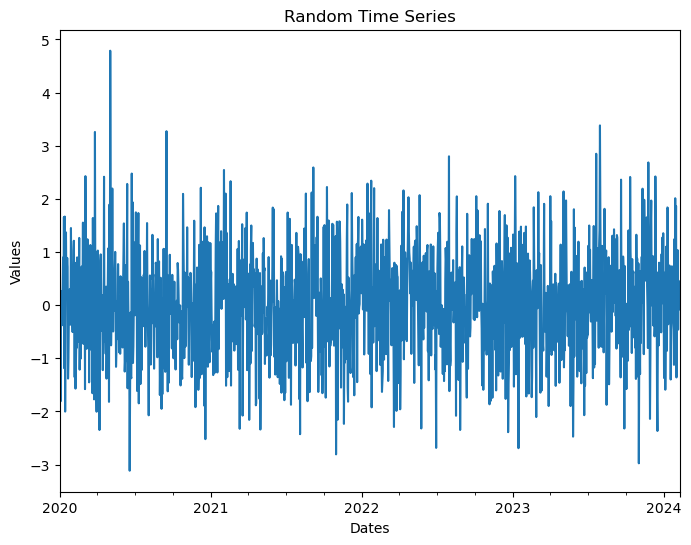

In [11]:
time_series.plot(figsize=(8, 6))
plt.xlabel('Dates')
plt.ylabel('Values')
plt.title('Random Time Series')
plt.show()

train_data = time_series[:750]
test_data = time_series[750:]

In [12]:
order = (1, 1, 1)
model = ARIMA(train_data, order=order)
fitted_model = model.fit()

forecast = fitted_model.forecast(steps=len(test_data))

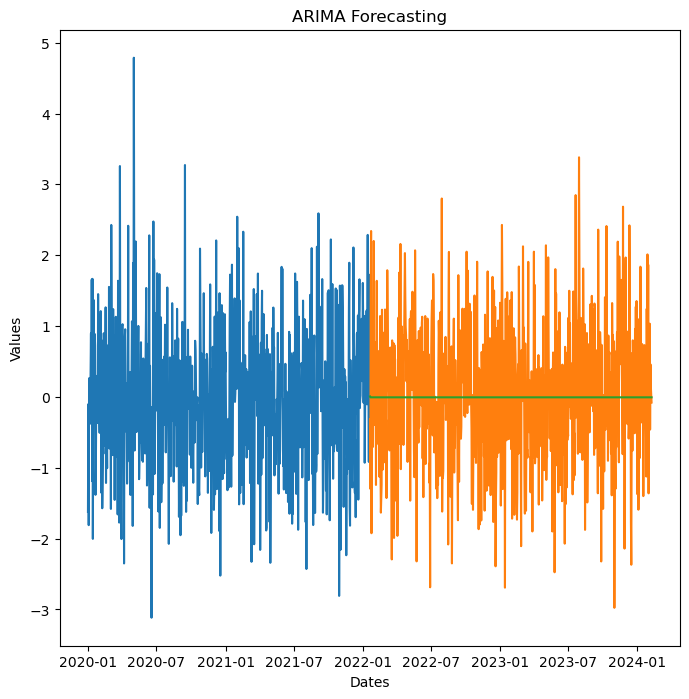

In [16]:
plt.figure(figsize=(8, 8))
plt.plot(train_data.index, train_data.values, label='Train Dataset')
plt.plot(test_data.index, test_data.values, label='Test Dataset')
plt.plot(test_data.index, forecast, label='Forecasted Data')
plt.xlabel('Dates')
plt.ylabel('Values')
plt.title('ARIMA Forecasting')
plt.show()

In [17]:
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.9776031849950881
